## Systolic BP Dataset

In [2]:
#import statements

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from sklearn import linear_model

/home/user/stackRoute/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Reading the data

In [4]:
sbp = pd.read_csv("Ex03_SystolicBP_Regreesion.csv")
sbp.head()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
0,45,1,0,2,2,99.149109,1.680932,35.090422,117.280944
1,62,1,1,4,1,76.609814,1.509772,33.609452,127.346514
2,61,1,0,2,2,72.619743,1.692017,25.365606,122.021401
3,51,1,0,3,2,73.858286,1.604062,28.704958,117.430179
4,42,1,0,2,1,83.861856,1.648855,30.846062,112.765810


## Scatter Plots

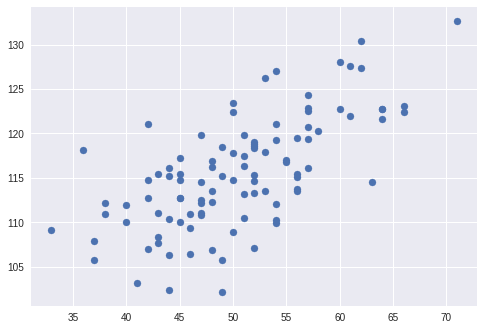

In [6]:
plt.scatter(sbp['Age'], sbp['SystolicBP'])
plt.show()

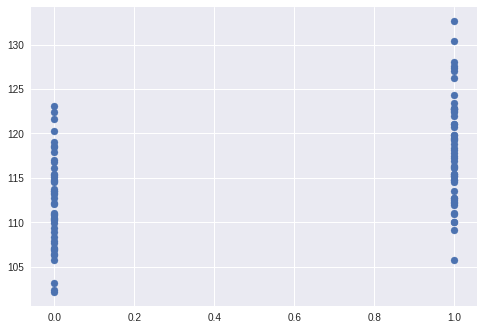

In [7]:
plt.scatter(sbp['Treated'], sbp['SystolicBP'])
plt.show()

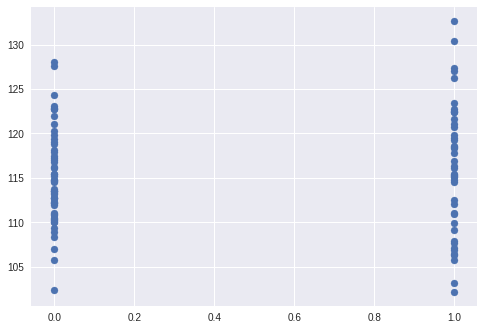

In [8]:
plt.scatter(sbp['Gender'], sbp['SystolicBP'])
plt.show()

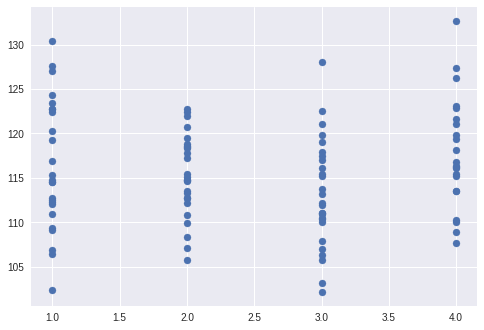

In [9]:
plt.scatter(sbp['FamilySize'], sbp['SystolicBP'])
plt.show()

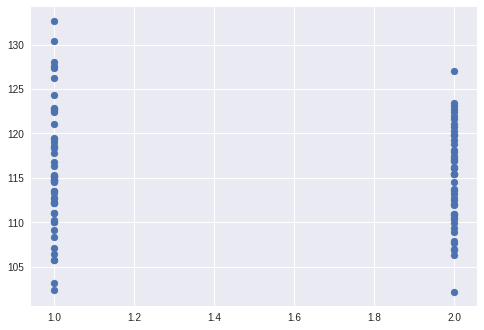

In [10]:
plt.scatter(sbp['Diet'], sbp['SystolicBP'])
plt.show()

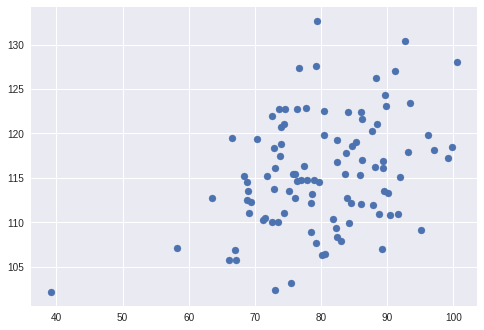

In [11]:
plt.scatter(sbp['Weight'], sbp['SystolicBP'])
plt.show()

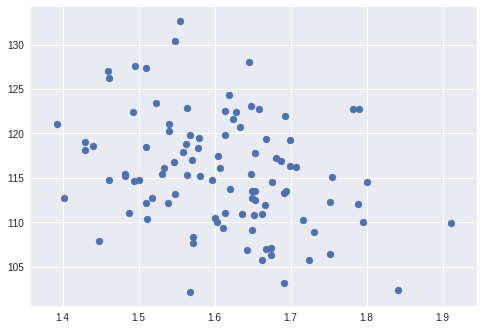

In [12]:
plt.scatter(sbp['Height'], sbp['SystolicBP'])
plt.show()

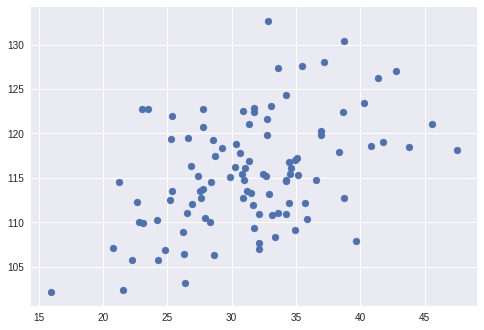

In [13]:
plt.scatter(sbp['ScaledBMI'], sbp['SystolicBP'])
plt.show()

## Feature Corelation Matrix

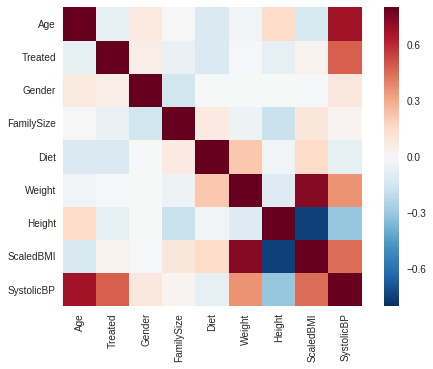

In [14]:
sbp_corr = sbp.corr()
sns.heatmap(sbp_corr, vmax=.8, square=True)
plt.show()

## Training and Test Dateset

Training set

In [17]:
train_sbp = sbp[:int(0.6*len(sbp))]
x_train = train_sbp.drop('SystolicBP', axis = 1)
y_train = train_sbp[['SystolicBP']]

Test set

In [26]:
test_sbp = sbp[int(0.6*len(sbp)):]
x_test = test_sbp.drop('SystolicBP', axis = 1)
y_test = np.array(test_sbp[['SystolicBP']])

## Normalizing the Dataset

In [20]:
x_train_std = np.array((x_train - x_train.mean())/x_train.std())
y_train_std = np.array((y_train - y_train.mean())/y_train.std())
x_test_std = np.array((x_test - x_test.mean())/x_test.std())

## Linear Regression Model

In [21]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit(x_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [22]:
linear_coeff = linear_reg.coef_

In [23]:
linear_intercept = linear_reg.intercept_

In [24]:
linear_predicted = linear_reg.predict(x_test_std) 

In [27]:
linear_predicted = (linear_predicted * y_test.std()) + y_test.mean()

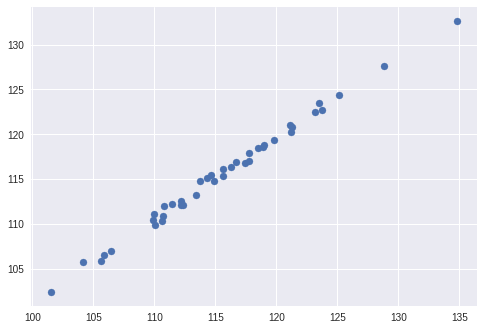

In [28]:
plt.scatter(linear_predicted, y_test)
plt.show()

In [29]:
linear_residuals = linear_predicted - y_test
linear_residuals_df = pd.DataFrame(linear_residuals)

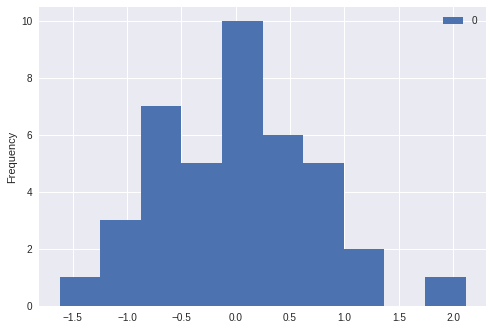

In [30]:
linear_residuals_df.plot(kind = 'hist')
plt.show()

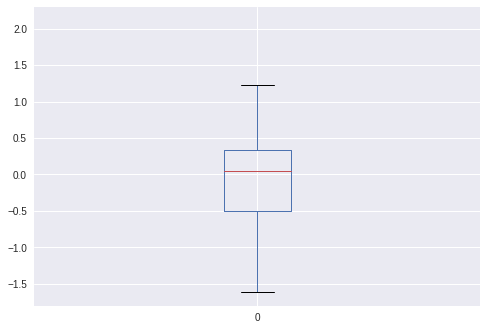

In [31]:
linear_residuals_df.plot(kind = 'box')
plt.show()

## Linear Regression Model - Lasso

In [32]:
alphas = np.linspace(0.00001,1,1000)*0.5

In [33]:
lasso_model = linear_model.Lasso(max_iter=10000, normalize=True)
lasso_coeff = []

for a in alphas:
    lasso_model.set_params(alpha = a)
    lasso_model.fit(x_train_std, y_train_std)
    lasso_coeff.append(lasso_model.coef_)

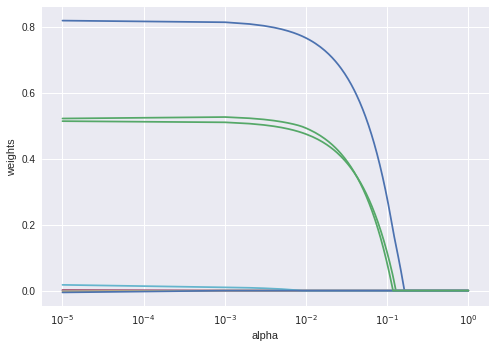

In [34]:
ax = plt.gca()
ax.plot(2*alphas, lasso_coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [35]:
y_train_std = y_train_std.reshape(60,)
lassocv = linear_model.LassoCV(alphas = alphas, cv=10, max_iter=100000, normalize=True)
lassocv.fit(x_train_std, y_train_std)

LassoCV(alphas=array([  5.00000e-06,   5.05495e-04, ...,   4.99500e-01,   5.00000e-01]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [36]:
lasso_model.set_params(alpha=lassocv.alpha_)
lasso_model.fit(x_train_std, y_train_std)

Lasso(alpha=5.0000000000000004e-06, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
lasso_predicted = lasso_model.predict(x_test_std)
lasso_predicted = lasso_predicted.reshape(40,1)
lasso_predicted = (lasso_predicted * y_test.std()) + y_test.mean()

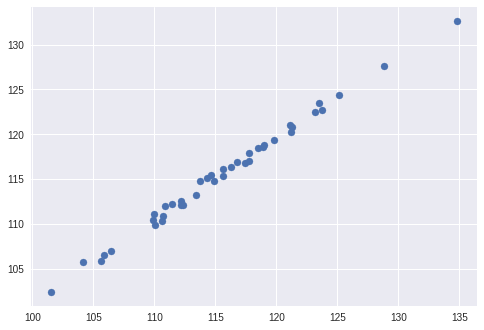

In [38]:
plt.scatter(lasso_predicted, y_test)
plt.show()

In [39]:
lasso_residuals = lasso_predicted - y_test
lasso_residuals_df = pd.DataFrame(lasso_residuals)

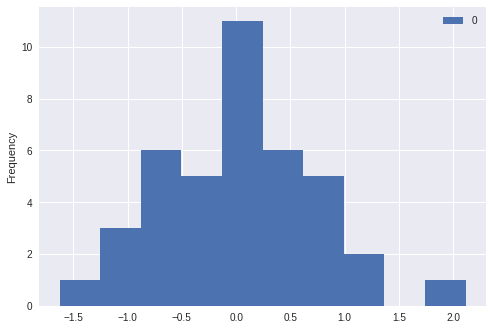

In [40]:
lasso_residuals_df.plot(kind = 'hist')
plt.show()

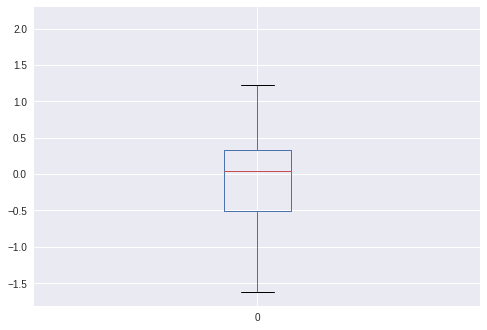

In [41]:
lasso_residuals_df.plot(kind = 'box')
plt.show()

## Linear Regression Model - Ridge

In [42]:
alphas = np.linspace(0.001,50,1000)*0.5

In [43]:
ridge_model = linear_model.Ridge(normalize = True)
ridge_coeff = []
for a in alphas:
    ridge_model.set_params(alpha = a)
    ridge_model.fit(x_train_std, y_train_std)
    ridge_coeff.append(ridge_model.coef_)

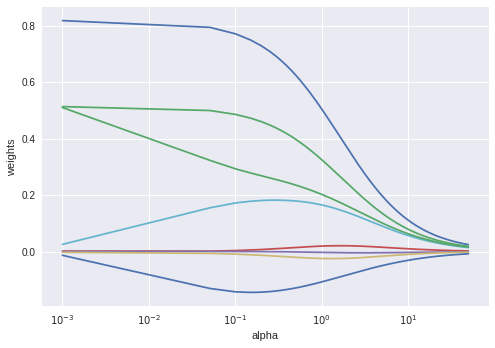

In [44]:
ax = plt.gca()
ax.plot(alphas*2, ridge_coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [45]:
ridgecv = linear_model.RidgeCV(alphas = alphas, normalize=True)
ridgecv.fit(x_train_std, y_train_std)

RidgeCV(alphas=array([  5.00000e-04,   2.55245e-02, ...,   2.49750e+01,   2.50000e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring=None, store_cv_values=False)

In [46]:
ridge_model.set_params(alpha = ridgecv.alpha_)
ridge_model.fit(x_train_std, y_train_std)

Ridge(alpha=0.00050000000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [48]:
ridge_predicted = ridge_model.predict(x_test_std)
ridge_predicted = ridge_predicted.reshape(40,1)
ridge_predicted = (ridge_predicted * y_test.std()) + y_test.mean()

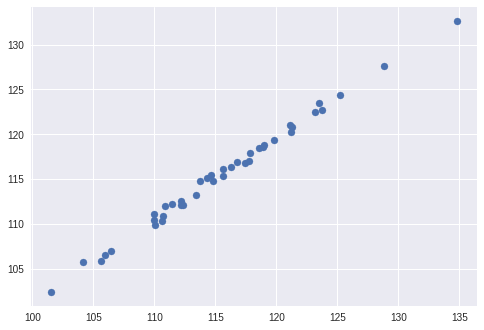

In [49]:
plt.scatter(ridge_predicted, y_test)
plt.show()

In [50]:
ridge_residuals = ridge_predicted - y_test
ridge_residuals_df = pd.DataFrame(ridge_residuals)

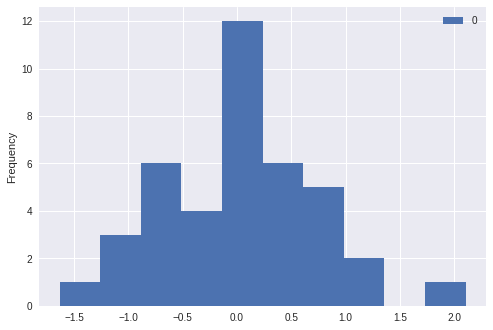

In [51]:
ridge_residuals_df.plot(kind = 'hist')
plt.show()

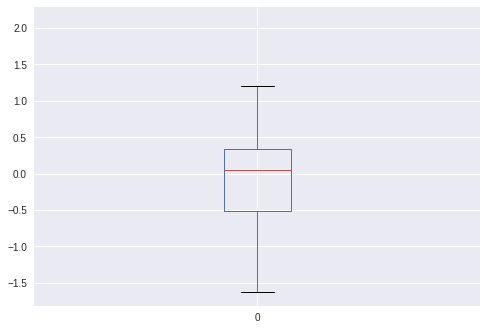

In [52]:
ridge_residuals_df.plot(kind = 'box')
plt.show()